In [1]:
import sys
import cv2 
import pytesseract 
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

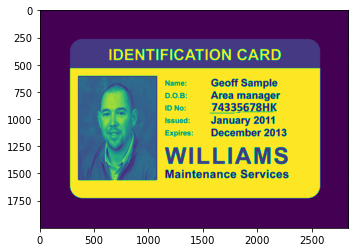

In [18]:
img = cv2.imread(r"C:\Users\shubh\OneDrive\Desktop\Projects\DIP PROJECT\s5_resized.png") 
  
# Preprocessing the image starts 
  
# Convert the image to gray scale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

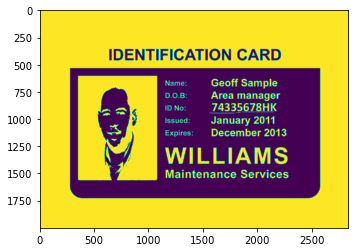

In [19]:
# Performing OTSU threshold 
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
plt.imshow(thresh1)

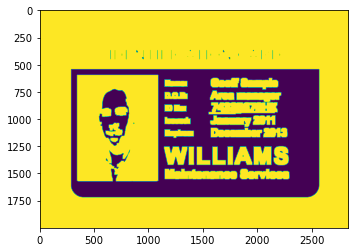

In [20]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20)) 
  
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
plt.imshow(dilation)

In [13]:
# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE)

In [21]:
for i in contours:
    print(i)
print(contours)
len(contours)

[[[0 0]]

 [[0 1]]

 [[0 2]]

 ...

 [[3 0]]

 [[2 0]]

 [[1 0]]]
[array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32)]


1

IDENTIFICATION CARD

Name: Geoff Sample
D.O.B: Area manager
ID No: 74335678HK
Issued: January 2011

Expires: December 2013

WILLIAMS

Maintenance Services

 



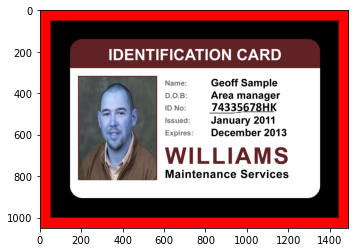

In [16]:
im2 = img.copy()  


for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 0, 0), 100)
    #print(rect) 
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w]   
    #plt.imshow(cropped)
    
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
    print(text)
    
    plt.imshow(im2)